In [2]:
import os
import pandas as pd
import numpy as np
import json
from math import sqrt

In [3]:
from Metrica_IO import read_match_data, to_metric_coordinates
metrica_path = '/home/greg/Documents/football/data/metrica/data'
tracking_home, tracking_away, events = read_match_data(metrica_path, 2)
events = to_metric_coordinates(events)
tracking_home = to_metric_coordinates(tracking_home)
tracking_away = to_metric_coordinates(tracking_away)
home_events = events[events['Team'] == 'Home']
away_events = events[events['Team'] == 'Away']
home_events.head()

Reading team: home
Reading team: away


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,12.72,-28.56,NaN,NaN
10,Home,BALL OUT,NaN,1,504,20.16,534,21.36,Player3,NaN,12.72,-28.56,4.24,-34.68
18,Home,CHALLENGE,AERIAL-WON,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN
19,Home,RECOVERY,INTERCEPTION,1,1084,43.36,1084,43.36,Player6,NaN,1.06,-17.00,NaN,NaN


In [4]:
events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

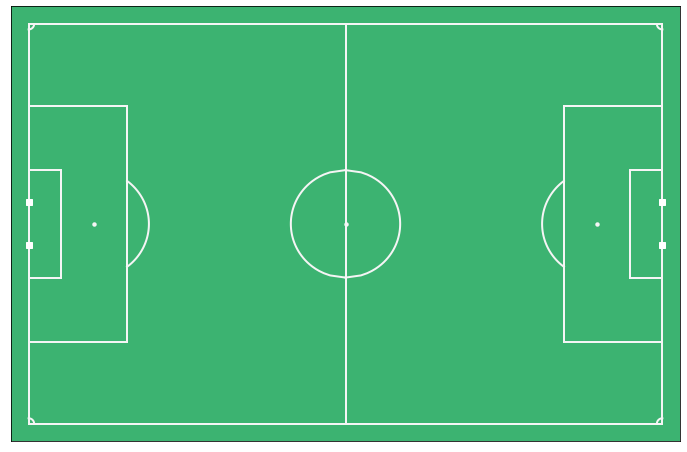

In [5]:
from Metrica_Viz import plot_pitch
fig, ax = plot_pitch()

In [6]:
home_shots = home_events[home_events.Type=='SHOT']
home_goals = home_shots[home_shots.Subtype.str.contains('GOAL')].copy()
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


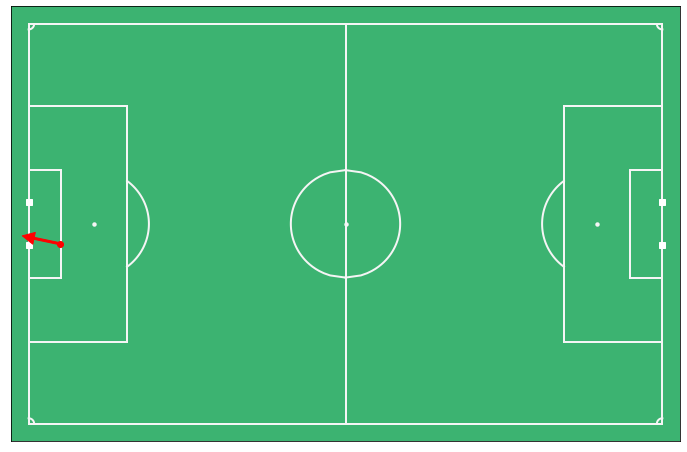

In [7]:
ax.plot(events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro')
ax.annotate("", xy=events.loc[198][['End X', 'End Y']], xytext=events.loc[198][['Start X', 'Start Y']], alpha=0.6, arrowprops=dict(color='r', width=2))#arrowstlye='->'
fig

In [13]:
events.loc[1108:1118]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1108,Home,RECOVERY,NaN,2,73594,2943.76,73594,2943.76,Player6,NaN,-23.32,3.40,NaN,NaN
1109,Home,PASS,NaN,2,73621,2944.84,73649,2945.96,Player6,Player5,-20.14,-0.68,-4.24,4.08
1110,Home,PASS,NaN,2,73692,2947.68,73731,2949.24,Player5,Player8,4.24,6.12,11.66,25.84
1111,Home,PASS,NaN,2,73813,2952.52,73844,2953.76,Player8,Player9,27.56,21.08,36.04,4.08
1112,Home,CHALLENGE,TACKLE-LOST,2,73854,2954.16,73854,2954.16,Player9,NaN,37.10,4.08,NaN,NaN
1113,Home,BALL LOST,THEFT,2,73854,2954.16,73854,2954.16,Player9,NaN,37.10,4.08,NaN,NaN
1114,Home,RECOVERY,INTERCEPTION,2,73877,2955.08,73877,2955.08,Player10,NaN,39.22,8.16,NaN,NaN
1115,Home,PASS,NaN,2,73902,2956.08,73923,2956.92,Player10,Player8,39.22,8.16,43.46,19.04
1116,Home,PASS,CROSS,2,73955,2958.20,73983,2959.32,Player8,Player9,46.64,19.72,47.70,-1.36
1117,Home,CHALLENGE,AERIAL-WON,2,73983,2959.32,73983,2959.32,Player9,NaN,47.70,-1.36,NaN,NaN


(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

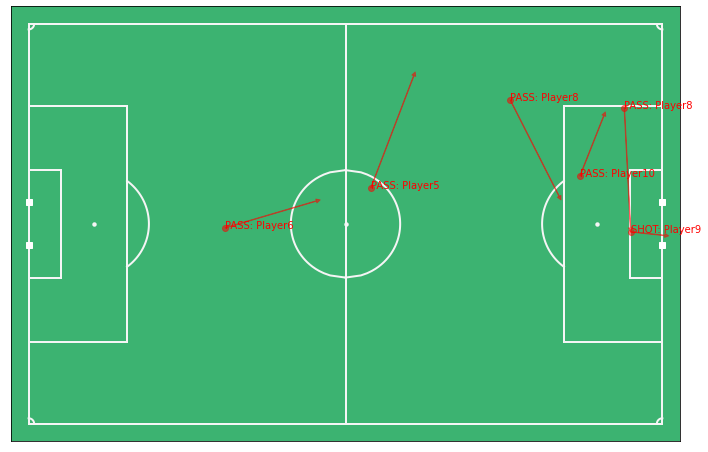

In [23]:
from Metrica_Viz import plot_events
#plot_events(events.loc[190:198], indicators = ['Marker', 'Arrow'], annotate=True)
plot_events(events.loc[[1109, 1110, 1111, 1115, 1116, 1118]], indicators = ['Marker', 'Arrow'], annotate=True)

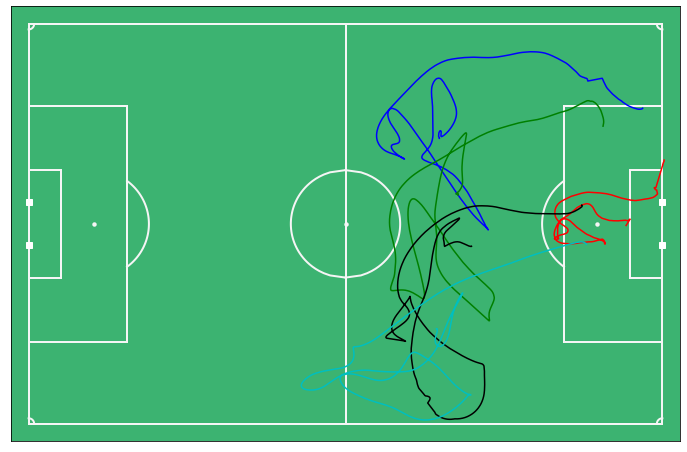

In [9]:
fig, ax = plot_pitch()
ax.plot(tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r', markersize=1)
ax.plot(tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b', markersize=1)
ax.plot(tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g', markersize=1)
ax.plot(tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k', markersize=1)
ax.plot(tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c', markersize=1)

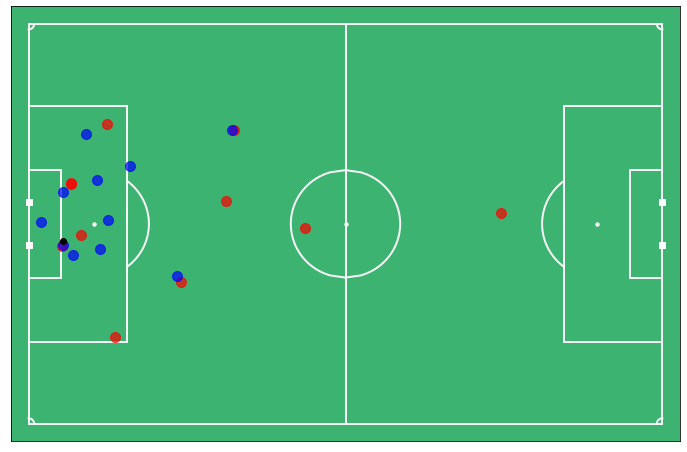

In [53]:
from Metrica_Viz import plot_frame
frame = events.loc[198]['Start Frame']
fig, ax = plot_frame(tracking_home.loc[frame], tracking_away.loc[frame])

In [11]:
tracking_home[['Home_10_x', 'Home_10_y']].iloc[150:155]
tracking_home['Home_10_x'].iloc[150:155]

Frame
151   -6.86244
152   -6.89424
153   -6.92392
154   -6.95148
155   -6.97692
Name: Home_10_x, dtype: float64

In [28]:
#tracking_home.drop(columns=["Home_1_x_delta", "Home_1_x_shifted"], inplace=True)
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09392,-30.29672,-23.36028,9.04400,NaN,NaN
141153,2,5646.12,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09286,-30.34568,-23.31046,9.03176,NaN,NaN
141154,2,5646.16,-46.3379,-0.84524,-12.19106,23.55792,-29.08852,5.87860,-24.22948,12.09788,...,NaN,NaN,-9.71278,24.17468,1.09074,-30.40348,-23.28714,9.02632,NaN,NaN


In [32]:
side = "Home"
delta = "_delta"
players = [f"{side}_{player}" for player in range(1,12)]
for player in players:
    player_x = player + "_x"
    player_y = player + "_y"
    tracking_home[player_x + delta] = abs(tracking_home[player_x] - tracking_home[player_x].shift(-1))
    tracking_home[player_y + delta] = abs(tracking_home[player_y] - tracking_home[player_y].shift(-1))
    tracking_home[player + delta] = np.sqrt(tracking_home[player_x + delta]**2 + tracking_home[player_y + delta]**2)

tracking_home.iloc[150:155]

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_8_delta,Home_9_x_delta,Home_9_y_delta,Home_9_delta,Home_10_x_delta,Home_10_y_delta,Home_10_delta,Home_11_x_delta,Home_11_y_delta,Home_11_delta
Frame,,,,,,,,,,,,,,,,,,,,,
151,1,6.04,44.44474,0.56372,17.99138,16.92044,19.55488,6.80612,16.50844,-3.24088,...,0.134639,0.04664,0.05372,0.071142,0.03180,0.07888,0.085049,0.04982,0.00068,0.049825
152,1,6.08,44.39492,0.56304,18.04968,17.02992,19.56230,6.86664,16.50102,-3.20824,...,0.135985,0.04240,0.06324,0.076138,0.02968,0.07480,0.080473,0.04770,0.00000,0.047700
153,1,6.12,44.34722,0.56304,18.10586,17.13872,19.56760,6.93192,16.49466,-3.17560,...,0.135841,0.04028,0.06732,0.078450,0.02756,0.07480,0.079716,0.04982,0.00000,0.049820
154,1,6.16,44.29740,0.56304,18.15992,17.24752,19.57184,6.99244,16.48830,-3.13548,...,0.136379,0.03816,0.07208,0.081558,0.02544,0.07072,0.075157,0.05088,0.00068,0.050885
155,1,6.20,44.24652,0.56372,18.21080,17.35700,19.57396,7.05228,16.48194,-3.09536,...,0.139211,0.03604,0.08160,0.089204,0.02332,0.06596,0.069961,0.04876,0.00544,0.049063


In [35]:
home_dist_ran = {player: tracking_home[player + delta].sum() for player in players}
home_dist_ran

{'Home_1': 10435.910545944453,
 'Home_2': 9991.68462272571,
 'Home_3': 9631.355461578069,
 'Home_4': 7321.092037567141,
 'Home_5': 12242.253653698697,
 'Home_6': 11608.051710477273,
 'Home_7': 11298.44973623627,
 'Home_8': 9113.617593105204,
 'Home_9': 9856.172043023205,
 'Home_10': 9098.232198097936,
 'Home_11': 5328.749975615327}

In [31]:
p9_shots = home_shots[home_shots["From"] == "Player9"]
p9_goals = p9_shots[p9_shots['Subtype'].str.contains('-GOAL')]
p9_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


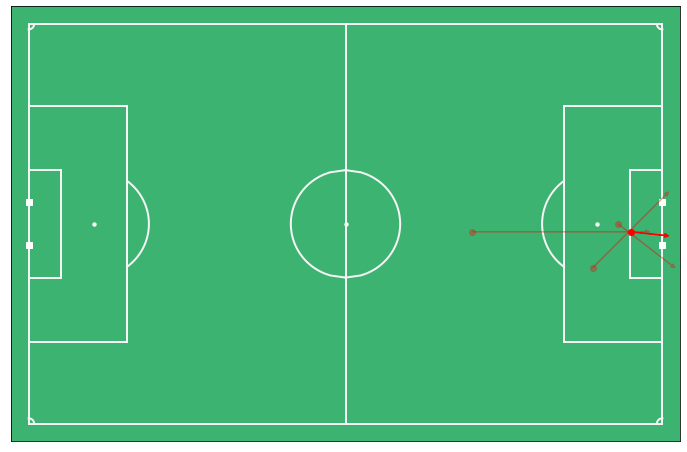

In [43]:
fig,ax = plot_pitch()
fig, ax = plot_events(p9_shots, figax=(fig, ax), indicators = ['Marker', 'Arrow'], annotate=False, alpha=0.3)
f, a = plot_events(p9_goals, figax=(fig, ax), indicators = ['Marker', 'Arrow'], annotate=False, alpha=1)

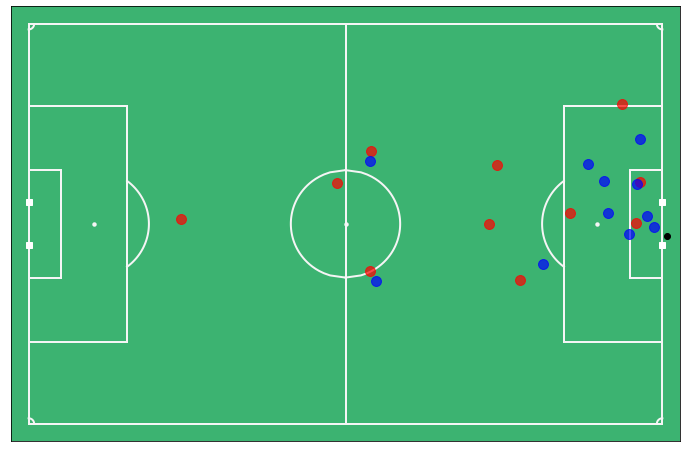

In [54]:
goal_frame = p9_goals.iloc[0]["End Frame"]
fig, ax = plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame])